# Reproduction of Fig. 1 from Thob et al. (2019)
Here we try to create a similar figure as the one presented by Thob et al. (2019) for the relations between the different morpho-kinimatic parameters. First, we import the Python packages

In [1]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from astropy.table import Table
from scipy import stats
import matplotlib.colors as colors
import matplotlib.cm as cm

We read the query data with astropy

In [2]:
Table.read('../../Data/InitialQuery.csv', format='ascii')

GalaxyID,DMEllipticity,DiscToTotal,DispAnisotropy,Ellipticity,KappaCoRot,MedOrbitCircu,RotToDispRatio,Triaxiality,MasaANegro,AcrecionMasaANegro,Masa,MasaMateriaOscura,MasaGas
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,0.07881416118313611,0.40713978900718306,-0.06330399501307094,0.43317660097754307,0.30411141418415494,0.21791510153279095,0.5888151998171891,0.43475736447011015,3670768.8,3.386793e-05,139429577000.0,128357564000.0,83765552.0
2,0.14115086845045632,0.45540397013578027,0.0016069357965954323,0.4194418575486196,0.3541853068777756,0.260477842965525,0.7316657343093015,0.26345891923277237,3599950.0,7.31597e-09,132794966000.0,121664340000.0,127600848.0
3,0.21260189713746824,0.4947171208411709,0.047972205596559125,0.4290507323475813,0.38789562992127,0.3105566731992107,0.848138163395796,0.21089581822901327,3558926.5,3.8772018e-07,122170941000.0,110975549000.0,201059248.0
4,0.19453083963799633,0.4001068760843328,-0.23217451890708873,0.43591737769213323,0.26111867073700684,0.19435070012723712,0.5245062215512457,0.1979126388916081,3501025.5,1.8196057e-05,203993760000.0,192370328000.0,346410720.0
5,0.22110837478846934,0.0021029095221080096,-0.2734711525572815,0.4713208681569664,0.14222777645385312,0.01194960946415184,0.00190359071071751,0.040310453332101294,3331357.2,0.0001642653,191415550000.0,179377750000.0,843632830.0
6,0.24307254165203662,0.1886542127069395,-0.17955189341659183,0.44761544093734784,0.21045125474426346,0.07785426105326988,0.1860235372118975,0.3144862712043965,2976699.5,9.0003704e-07,151063331000.0,138421027000.0,2169467140.0
7,0.3355855347361052,0.43972802244261655,-0.24839833773468056,0.4054807301363227,0.2748705390874355,0.20586499651581155,0.5258432463928291,0.2536484192907611,2965977.8,4.8014922e-08,234519298000.0,219688534000.0,4707850800.0
8,0.3622733943958599,0.5155763341538696,0.02527457445758463,0.36123460990013156,0.3924876888834857,0.3073785995679593,0.8345391196856949,0.19678504479839135,3083270.0,1.5243896e-06,325848891000.0,308000719000.0,8252066800.0
9,0.361990793939168,0.4603353892148281,-0.29378437052182305,0.41274800630732134,0.2841291114545444,0.21566276368815396,0.5932924599354679,0.1696249284806182,2714422.0,1.381053e-05,306855248000.0,287110300000.0,10776853500.0


Then we assign the table to a variable

In [3]:
t = Table.read('../../Data/InitialQuery.csv', format='ascii')

Turning table to a pandas' dataframe

In [4]:
df = t.to_pandas()
df

,GalaxyID,DMEllipticity,DiscToTotal,DispAnisotropy,Ellipticity,KappaCoRot,MedOrbitCircu,RotToDispRatio,Triaxiality,MasaANegro,AcrecionMasaANegro,Masa,MasaMateriaOscura,MasaGas
0,1,0.078814,0.407140,-0.063304,0.433177,0.304111,0.217915,0.588815,0.434757,3670768.80,3.386793e-05,1.394296e+11,1.283576e+11,83765552.0
1,2,0.141151,0.455404,0.001607,0.419442,0.354185,0.260478,0.731666,0.263459,3599950.00,7.315970e-09,1.327950e+11,1.216643e+11,127600848.0
2,3,0.212602,0.494717,0.047972,0.429051,0.387896,0.310557,0.848138,0.210896,3558926.50,3.877202e-07,1.221709e+11,1.109755e+11,201059248.0
3,4,0.194531,0.400107,-0.232175,0.435917,0.261119,0.194351,0.524506,0.197913,3501025.50,1.819606e-05,2.039938e+11,1.923703e+11,346410720.0
4,5,0.221108,0.002103,-0.273471,0.471321,0.142228,0.011950,0.001904,0.040310,3331357.20,1.642653e-04,1.914156e+11,1.793778e+11,843632830.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15581,447839,0.425048,0.118257,0.287787,0.505563,0.168130,0.071755,0.113385,0.538363,151795.84,4.693862e-11,3.501969e+10,3.465130e+10,324556672.0
15582,447840,0.423208,0.118191,0.256377,0.521638,0.225110,0.106045,0.166303,0.708379,151746.88,1.535701e-10,3.382889e+10,3.343821e+10,348297408.0
15583,448916,0.350888,0.111116,-0.050673,0.351533,0.180507,0.083108,0.149036,0.943685,148212.00,7.861806e-10,3.683292e+10,3.600740e+10,775508160.0
15584,448917,0.360480,0.113065,0.027423,0.377660,0.204416,0.049646,0.096367,0.972778,148208.75,1.246126e-10,3.481568e+10,3.403810e+10,729236800.0


Cheking the dataframe (df) created 

In [5]:
df.describe()

,GalaxyID,DMEllipticity,DiscToTotal,DispAnisotropy,Ellipticity,KappaCoRot,MedOrbitCircu,RotToDispRatio,Triaxiality,MasaANegro,AcrecionMasaANegro,Masa,MasaMateriaOscura,MasaGas
count,1.558600e+04,15586.000000,15586.000000,15586.000000,15586.000000,15586.000000,15586.000000,15586.000000,15586.000000,1.558600e+04,1.558600e+04,1.558600e+04,1.558600e+04,1.558600e+04
mean,1.537223e+06,0.386919,0.238464,0.217904,0.507991,0.272815,0.156356,0.332197,0.597743,1.676262e+06,2.667496e-04,1.511883e+11,1.403583e+11,8.864924e+09
std,2.059825e+06,0.124214,0.175288,0.269966,0.137366,0.109870,0.143231,0.338826,0.262046,1.191951e+07,9.038365e-03,4.993767e+11,4.604036e+11,3.491294e+10
min,1.000000e+00,0.025403,-0.651834,-2.094432,0.035254,0.070846,-0.514682,0.000090,0.002863,0.000000e+00,0.000000e+00,4.391130e+08,3.708355e+08,0.000000e+00
25%,2.875302e+05,0.300046,0.108939,0.069627,0.423687,0.192942,0.058242,0.121219,0.399034,1.477211e+05,2.104634e-12,2.583313e+10,2.389617e+10,1.050555e+09
50%,8.274655e+05,0.392914,0.196809,0.258686,0.523712,0.238095,0.111648,0.224273,0.655290,1.505738e+05,5.304515e-11,4.953519e+10,4.621992e+10,2.865444e+09
75%,1.498108e+06,0.476209,0.335810,0.413363,0.609322,0.324826,0.208289,0.416636,0.818219,2.990465e+05,2.028050e-09,9.993667e+10,9.262829e+10,6.520260e+09
max,7.147411e+06,0.789305,0.861619,0.847404,0.884760,0.770102,0.875559,3.402193,0.997937,3.604136e+08,8.859110e-01,1.557871e+13,1.420442e+13,1.262470e+12


Data with values below zero are deleted

In [6]:
df=df.drop(df[df['DiscToTotal']<0].index)
df=df.drop(df[df['KappaCoRot']<0].index)
df=df.drop(df[df['MedOrbitCircu']<0].index)

Calculating the spearman rank-order coefficients

In [7]:
df.corr(method='spearman')

,GalaxyID,DMEllipticity,DiscToTotal,DispAnisotropy,Ellipticity,KappaCoRot,MedOrbitCircu,RotToDispRatio,Triaxiality,MasaANegro,AcrecionMasaANegro,Masa,MasaMateriaOscura,MasaGas
GalaxyID,1.000000,-0.078173,-0.021054,-0.191373,-0.156186,-0.060589,-0.033798,-0.016480,0.013643,-0.032832,-0.073180,-0.207172,-0.214830,-0.071297
DMEllipticity,-0.078173,1.000000,-0.190926,0.155280,0.530480,-0.229670,-0.246382,-0.229388,0.393822,0.046391,0.045387,0.225877,0.224250,0.280452
DiscToTotal,-0.021054,-0.190926,1.000000,0.326920,0.263531,0.855512,0.957429,0.982182,-0.431586,0.217453,0.158145,0.236307,0.225222,0.322969
DispAnisotropy,-0.191373,0.155280,0.326920,1.000000,0.527238,0.536476,0.383966,0.316322,-0.211367,0.108961,0.063310,0.177271,0.175723,0.177382
Ellipticity,-0.156186,0.530480,0.263531,0.527238,1.000000,0.238303,0.252019,0.216686,0.136130,0.171122,0.129109,0.310763,0.305754,0.363682
KappaCoRot,-0.060589,-0.229670,0.855512,0.536476,0.238303,1.000000,0.865516,0.881315,-0.581592,0.244288,0.171346,0.270742,0.261518,0.320308
MedOrbitCircu,-0.033798,-0.246382,0.957429,0.383966,0.252019,0.865516,1.000000,0.965742,-0.482550,0.157923,0.122811,0.137046,0.128260,0.206278
RotToDispRatio,-0.016480,-0.229388,0.982182,0.316322,0.216686,0.881315,0.965742,1.000000,-0.486941,0.212851,0.153181,0.223618,0.212948,0.302490
Triaxiality,0.013643,0.393822,-0.431586,-0.211367,0.136130,-0.581592,-0.482550,-0.486941,1.000000,-0.181801,-0.148416,-0.132726,-0.131172,-0.090784
MasaANegro,-0.032832,0.046391,0.217453,0.108961,0.171122,0.244288,0.157923,0.212851,-0.181801,1.000000,0.532694,0.643458,0.639913,0.564539


Setting seaborn style

In [8]:
sns.set()
sns.set_style("white")
sns.set_context("talk")

Defining histograms

In [9]:
bins_ytotal = np.linspace(0, 1, 41)
bins_xtotal = np.linspace(0, 3.5, 41)

#For DiscToTotal
Hnumber1, _, yedges_dt = np.histogram2d(df['RotToDispRatio'], df['DiscToTotal'],
                                        bins=(bins_xtotal,bins_ytotal))
Hnumber1[Hnumber1 <= 3.0] = np.nan #Coloring only the cells with more than 3 galaxies

#For KappaCoRot
Hnumber2, _, yedges_kco = np.histogram2d(df['RotToDispRatio'], df['KappaCoRot'], bins=(bins_xtotal, bins_ytotal))
Hnumber2[Hnumber2 <= 3.0] = np.nan #Coloring only the cells with more than 3 galaxies

#For MedOrbitCircu
Hnumber3, xedges, yedges_mor = np.histogram2d(df['RotToDispRatio'], df['MedOrbitCircu'], bins=(bins_xtotal,bins_ytotal))
Hnumber3[Hnumber3 <= 3.0] = np.nan #Coloring only the cells with more than 3 galaxies

Defining percentiles and mean for each case

In [10]:
def per_16(array):
    """Percentile at 16th"""
    return np.nanpercentile(array, 16)

def per_84(array):
    """Percentile at 84th"""
    return np.nanpercentile(array, 84)

#For DiscToTotal
means1, edges, numbers = stats.binned_statistic(df['RotToDispRatio'], df['DiscToTotal'],  bins=bins_xtotal, statistic='median')
means1_16, edges, numbers = stats.binned_statistic(df['RotToDispRatio'], df['DiscToTotal'], bins=bins_xtotal, statistic=per_16)
means1_84, edges_dt, numbers = stats.binned_statistic(df['RotToDispRatio'], df['DiscToTotal'], bins=bins_xtotal, statistic=per_84)
#For KappaCoRot
means2, edges, numbers = stats.binned_statistic(df['RotToDispRatio'],df['KappaCoRot'], bins=bins_xtotal, statistic='median')
means2_16, edges, numbers = stats.binned_statistic(df['RotToDispRatio'],df['KappaCoRot'], bins=bins_xtotal, statistic=per_16)
means2_84, edges_kco, numbers = stats.binned_statistic(df['RotToDispRatio'],df['KappaCoRot'], bins=bins_xtotal, statistic=per_84)
#For MedOrbitCircu
means3, edges, numbers = stats.binned_statistic(df['RotToDispRatio'],df['MedOrbitCircu'], bins=bins_xtotal, statistic='median')
means3_16, edges, numbers = stats.binned_statistic(df['RotToDispRatio'],df['MedOrbitCircu'], bins=bins_xtotal, statistic=per_16)
means3_84, edges_mor, numbers = stats.binned_statistic(df['RotToDispRatio'],df['MedOrbitCircu'], bins=bins_xtotal, statistic=per_84)

In [11]:
xrange_bins = bins_xtotal[:-1] + np.diff(bins_xtotal)/2

Plotting all subplots

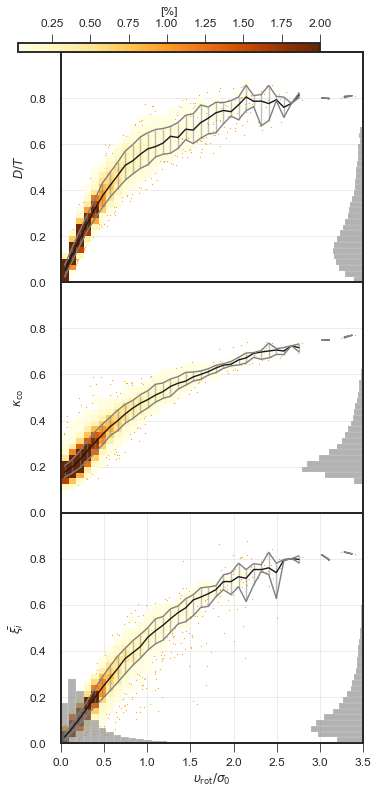

In [16]:
with plt.style.context('seaborn-paper'):
    plt.rcParams.update({'font.size': 12})
    plt.rcParams.update({'axes.labelsize': 12})
    plt.rcParams.update({'legend.fontsize': 12})
    plt.rcParams.update({'ytick.labelsize': 12})
    plt.rcParams.update({'xtick.labelsize': 12})

    fig, ((ax1, ax2, ax3)) = plt.subplots(3, 1, figsize=(6,12), facecolor= 'white', sharex=False)
    #DiscToTotal
    ax1.scatter(df['RotToDispRatio'], df['DiscToTotal'], c='Orange', s=1)       #Scattering
    mapa1 = ax1.imshow(Hnumber1.T/np.nansum(Hnumber1) *100, interpolation='None', origin='lower', cmap='YlOrBr',
                       extent=[bins_xtotal[0], bins_xtotal[-1], bins_ytotal[0], bins_ytotal[-1]], zorder=1, vmax=2)
    ax1.plot(xrange_bins, means1, c='k')
    ax1.plot(xrange_bins, means1_16, c='gray')
    ax1.plot(xrange_bins, means1_84, c='gray')
    ax1.vlines(xrange_bins, means1_16, means1_84, alpha=0.5, color='gray')
    ax1.set_ylabel(r'$D/T$')

    ax1_1 = ax1.twiny()
    ax1_1.hist(df['DiscToTotal'], bins=bins_ytotal, orientation='horizontal', color='gray', weights=[3e-4]*len(df), alpha=0.6)
    ax1_1.set_xlim(bins_xtotal[-1],bins_xtotal[0])
    ax1_1.set_xticks([])
    ax1.set_xticks([])

    #KappaCoRot
    ax2.scatter(x=df['RotToDispRatio'], y=df['KappaCoRot'], c='Orange', s=1)       #Scattering
    mapa2 = ax2.imshow(Hnumber2.T/np.nansum(Hnumber2) *100, interpolation='None', origin='lower', cmap='YlOrBr',
                       extent=[bins_xtotal[0], bins_xtotal[-1], bins_ytotal[0], bins_ytotal[-1]], zorder=1, vmax=2)
    ax2.plot(xrange_bins, means2, c='k')
    ax2.plot(xrange_bins, means2_16, c='gray')
    ax2.plot(xrange_bins ,means2_84, c='gray')
    ax2.vlines(xrange_bins, means2_16, means2_84, alpha=0.5, color='gray')
    ax2.set_ylabel(r'$\kappa_{\rm{co}}$')

    ax2_1 = ax2.twiny()
    ax2_1.hist(df['KappaCoRot'], bins=bins_ytotal, orientation='horizontal', color='gray', weights=[3e-4]*len(df), alpha=0.6)
    ax2_1.set_xlim(bins_xtotal[-1],bins_xtotal[0])
    ax2_1.set_xticks([])
    ax2.set_xticks([])

    #MedOrbitCircu
    ax3.scatter(x=df['RotToDispRatio'], y=df['MedOrbitCircu'], c='Orange', s=1)       #Scattering
    mapa2 = ax3.imshow(Hnumber3.T/np.nansum(Hnumber3) *100, interpolation='None', origin='lower', cmap='YlOrBr',
                       extent=[bins_xtotal[0], bins_xtotal[-1], bins_ytotal[0], bins_ytotal[-1]], zorder=1, vmax=2)
    ax3.plot(xrange_bins, means3, c='k')
    ax3.plot(xrange_bins, means3_16, c='gray')
    ax3.plot(xrange_bins ,means3_84, c='gray')
    ax3.vlines(xrange_bins, means3_16, means3_84, alpha=0.5, color='gray')
    ax3.set_ylabel(r'$\bar{\xi_i}$')

    ax3_1 = ax3.twiny()
    ax3_1.hist(df['MedOrbitCircu'], bins=bins_ytotal, orientation='horizontal', color='gray', weights=[3e-4]*len(df), alpha=0.6)
    ax3_1.set_xlim(bins_xtotal[-1],bins_xtotal[0])
    ax3_1.set_xticks([])

    ax3.hist(df['RotToDispRatio'], bins=bins_xtotal, color='gray', weights=[8e-5]*len(df), alpha=0.6, zorder=2)

    #Colorbar for all
    cbaxes = fig.add_axes([0.1, 0.9, 0.7, 0.01])        #Colorbar
    plt.colorbar(mapa1, ax=ax1, cax = cbaxes, orientation="horizontal", label='[%]')
    cbaxes.xaxis.set_label_position("top")
    cbaxes.xaxis.set_ticks_position("top")


    # Adjust figure
    ax3.set_xlabel(r'$\upsilon_{\rm{rot}}/\sigma_0$')
    fig.subplots_adjust(bottom=0.1, top=0.9, left=0.2, right=0.9,
                        wspace=0.0, hspace=0.0)
    for axs in [ax1,ax2,ax3]:
        axs.set_aspect('auto')
        axs.grid(color='0.9')
        axs.set_xlim(bins_xtotal[0],bins_xtotal[-1])
        axs.set_yticks([0,0.2,0.4,0.6,0.8])

Saving the Figure

In [17]:
fig.savefig('../Figures/Figure1.png')

Now, we do the same Figure but this time for the presentation

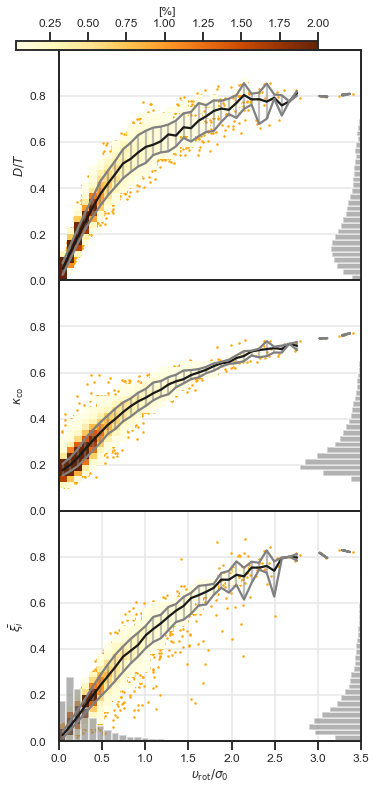

In [18]:
plt.rcParams.update({'font.size': 12})
plt.rcParams.update({'axes.labelsize': 12})
plt.rcParams.update({'legend.fontsize': 12})
plt.rcParams.update({'ytick.labelsize': 12})
plt.rcParams.update({'xtick.labelsize': 12})

fig, ((ax1, ax2, ax3)) = plt.subplots(3, 1, figsize=(6,12), facecolor= 'white', sharex=False)
#DiscToTotal
ax1.scatter(df['RotToDispRatio'], df['DiscToTotal'], c='Orange', s=1)       #Scattering
mapa1 = ax1.imshow(Hnumber1.T/np.nansum(Hnumber1) *100, interpolation='None', origin='lower', cmap='YlOrBr',
                  extent=[bins_xtotal[0], bins_xtotal[-1], bins_ytotal[0], bins_ytotal[-1]], zorder=1, vmax=2)
ax1.plot(xrange_bins, means1, c='k')
ax1.plot(xrange_bins, means1_16, c='gray')
ax1.plot(xrange_bins, means1_84, c='gray')
ax1.vlines(xrange_bins, means1_16, means1_84, alpha=0.5, color='gray')
ax1.set_ylabel(r'$D/T$')

ax1_1 = ax1.twiny()
ax1_1.hist(df['DiscToTotal'], bins=bins_ytotal, orientation='horizontal', color='gray', weights=[3e-4]*len(df), alpha=0.6)
ax1_1.set_xlim(bins_xtotal[-1],bins_xtotal[0])
ax1_1.set_xticks([])
ax1.set_xticks([])

#KappaCoRot
ax2.scatter(x=df['RotToDispRatio'], y=df['KappaCoRot'], c='Orange', s=1)       #Scattering
mapa2 = ax2.imshow(Hnumber2.T/np.nansum(Hnumber2) *100, interpolation='None', origin='lower', cmap='YlOrBr',
                   extent=[bins_xtotal[0], bins_xtotal[-1], bins_ytotal[0], bins_ytotal[-1]], zorder=1, vmax=2)
ax2.plot(xrange_bins, means2, c='k')
ax2.plot(xrange_bins, means2_16, c='gray')
ax2.plot(xrange_bins ,means2_84, c='gray')
ax2.vlines(xrange_bins, means2_16, means2_84, alpha=0.5, color='gray')
ax2.set_ylabel(r'$\kappa_{\rm{co}}$')

ax2_1 = ax2.twiny()
ax2_1.hist(df['KappaCoRot'], bins=bins_ytotal, orientation='horizontal', color='gray', weights=[3e-4]*len(df), alpha=0.6)
ax2_1.set_xlim(bins_xtotal[-1],bins_xtotal[0])
ax2_1.set_xticks([])
ax2.set_xticks([])

#MedOrbitCircu
ax3.scatter(x=df['RotToDispRatio'], y=df['MedOrbitCircu'], c='Orange', s=1)       #Scattering
mapa2 = ax3.imshow(Hnumber3.T/np.nansum(Hnumber3) *100, interpolation='None', origin='lower', cmap='YlOrBr',
                   extent=[bins_xtotal[0], bins_xtotal[-1], bins_ytotal[0], bins_ytotal[-1]], zorder=1, vmax=2)
ax3.plot(xrange_bins, means3, c='k')
ax3.plot(xrange_bins, means3_16, c='gray')
ax3.plot(xrange_bins ,means3_84, c='gray')
ax3.vlines(xrange_bins, means3_16, means3_84, alpha=0.5, color='gray')
ax3.set_ylabel(r'$\bar{\xi_i}$')

ax3_1 = ax3.twiny()
ax3_1.hist(df['MedOrbitCircu'], bins=bins_ytotal, orientation='horizontal', color='gray', weights=[3e-4]*len(df), alpha=0.6)
ax3_1.set_xlim(bins_xtotal[-1],bins_xtotal[0])
ax3_1.set_xticks([])

ax3.hist(df['RotToDispRatio'], bins=bins_xtotal, color='gray', weights=[8e-5]*len(df), alpha=0.6, zorder=2)

#Colorbar for all
cbaxes = fig.add_axes([0.1, 0.9, 0.7, 0.01])        #Colorbar
plt.colorbar(mapa1, ax=ax1, cax = cbaxes, orientation="horizontal", label='[%]')
cbaxes.xaxis.set_label_position("top")
cbaxes.xaxis.set_ticks_position("top")


# Adjust figure
ax3.set_xlabel(r'$\upsilon_{\rm{rot}}/\sigma_0$')
fig.subplots_adjust(bottom=0.1, top=0.9, left=0.2, right=0.9,
                    wspace=0.0, hspace=0.0)
for axs in [ax1,ax2,ax3]:
    axs.set_aspect('auto')
    axs.grid(color='0.9')
    axs.set_xlim(bins_xtotal[0],bins_xtotal[-1])
    axs.set_yticks([0,0.2,0.4,0.6,0.8])

In [19]:
fig.savefig('../Figures/Figure1presentation.png')